In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction

The analysis of the Superstore dataset aims to uncover actionable insights into sales and profit trends, identifying high-performing and underperforming categories, regions, and timeframes. By leveraging visualizations and statistical analysis, we aim to optimize strategies for increasing profitability and mitigating losses.

# Step 1: Load the Dataset

First, we load the dataset into a pandas DataFrame and explore it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv")

In [4]:
# Display the first 5 rows of the dataset
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [5]:
# Summary information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


# Step 2: Understand the Dataset

Inspect columns and data types to identify key features for analysis:

Columns like Sales, Profit, Discount, and Category will be crucial.
Check for missing values or inconsistencies.

In [6]:
# Display column names
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [7]:
# Check for missing values
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [9]:
# Descriptive statistics for numeric columns
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


# Step 3: Data Cleaning

Remove Duplicates:

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (9977, 13)


Handle Missing Values: If missing values exist, fill or drop them as appropriate.

In [13]:
# Drop rows with missing values (if necessary)
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (9977, 13)


Standardize Column Names: Rename columns for easier analysis.

In [14]:
# Rename columns (if necessary)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


# Step 4: Exploratory Data Analysis (EDA)

Use pandas and visualization libraries like Matplotlib and Seaborn for insights.

1. Overall Profitabil
   ity
Analyze overall sales and profit trends.

In [15]:
# Total sales and profit
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
print(f"Total Sales: {total_sales}, Total Profit: {total_profit}")


Total Sales: 2296195.5903, Total Profit: 286241.4226


 Top Categories by Sales
Group by Category and calculate sales and profit.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv")

# Confirm the data is loaded
print(df.head())


        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [4]:
# Group by category and calculate total sales and profit
category_analysis = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Display the result
print(category_analysis)


                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


In [5]:
# Check column names
print(df.columns)


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [6]:
# Rename columns to match the dataset
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Use the updated column names
category_analysis = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
print(category_analysis)


                       sales       profit
category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


3. Impact of Discount on Profit
   
Analyze how discounts affect profitability.



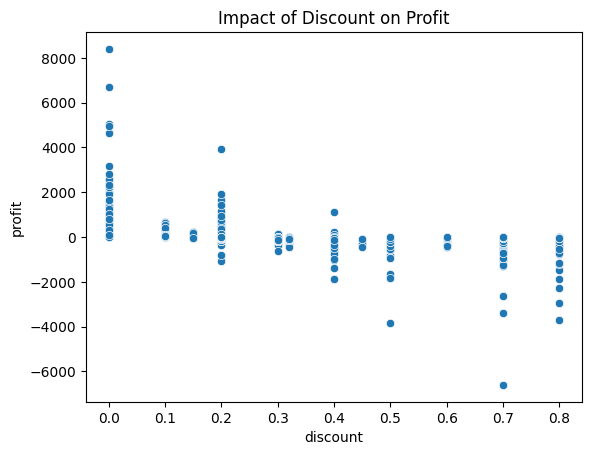

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Discount vs Profit
sns.scatterplot(data=df, x='discount', y='profit')
plt.title("Impact of Discount on Profit")
plt.show()


4. Regional Analysis
Which regions generate the most profit?

region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64


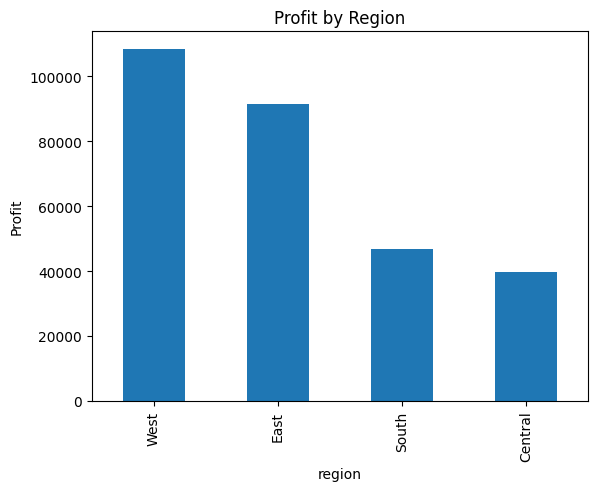

In [9]:
# Profit by region
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False)
print(region_profit)

# Bar plot for regional profit
region_profit.plot(kind='bar', title="Profit by Region")
plt.ylabel('Profit')
plt.show()


# Step 5: Mitigating Losses

Identify products or regions with negative profit:

In [11]:
print(df.columns)


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


In [12]:
# Standardize column names for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)  # Confirm new column names


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


In [14]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Check column names again
print(df.columns)


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


In [16]:
# Filter rows with negative profit
loss_analysis = df[df['profit'] < 0]

# Group by region
print(loss_analysis.groupby('region')['profit'].sum())

# Group by sub-category
print(loss_analysis.groupby('sub_category')['profit'].sum())


region
Central   -56314.8850
East      -49590.6075
South     -27504.8323
West      -22720.9609
Name: profit, dtype: float64
sub_category
Accessories     -930.6265
Appliances     -8629.6412
Binders       -38510.4964
Bookcases     -12152.2060
Chairs         -9880.8413
Fasteners        -33.1952
Furnishings    -6490.9134
Machines      -30118.6682
Phones         -7530.6235
Storage        -6426.3038
Supplies       -3015.6219
Tables        -32412.1483
Name: profit, dtype: float64


In [17]:
# If no 'sub_category', use 'category' or another relevant column
print(loss_analysis.groupby('category')['profit'].sum())


category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: profit, dtype: float64


In [18]:
print(df.head())


        ship_mode    segment        country             city       state  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   postal_code region         category sub_category     sales  quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   discount    profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

# Step 6: Optimize Profit Margins

1 m Most Profitable Subcategories

In [21]:
# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")

# Display cleaned column names
print(df.columns)


Index(['ship_mode', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')


In [22]:
# Group by subcategory and analyze sales and profit
subcategory_profit = df.groupby('sub_category')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)
print(subcategory_profit)


                    sales      profit
sub_category                         
Copiers       149528.0300  55617.8249
Phones        330007.0540  44515.7306
Accessories   167380.3180  41936.6357
Paper          78479.2060  34053.5693
Binders       203412.7330  30221.7633
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Appliances    107532.1610  18138.0054
Furnishings    91705.1640  13059.1436
Envelopes      16476.4020   6964.1767
Art            27118.7920   6527.7870
Labels         12486.3120   5546.2540
Machines      189238.6310   3384.7569
Fasteners       3024.2800    949.5182
Supplies       46673.5380  -1189.0995
Bookcases     114879.9963  -3472.5560
Tables        206965.5320 -17725.4811


In [23]:
# Group by category as an alternative
category_profit = df.groupby('category')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)
print(category_profit)


                       sales       profit
category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728


2. State-Level Analysis

In [24]:
# Profit by state
state_profit = df.groupby('state')['profit'].sum().sort_values(ascending=False)
print(state_profit.head(10))  # Top 10 profitable states


state
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: profit, dtype: float64


# Step 7: Visualize Key Insights

Leverage Seaborn or Matplotlib for impactful visualizations
.

1. Sales and Profit by Category

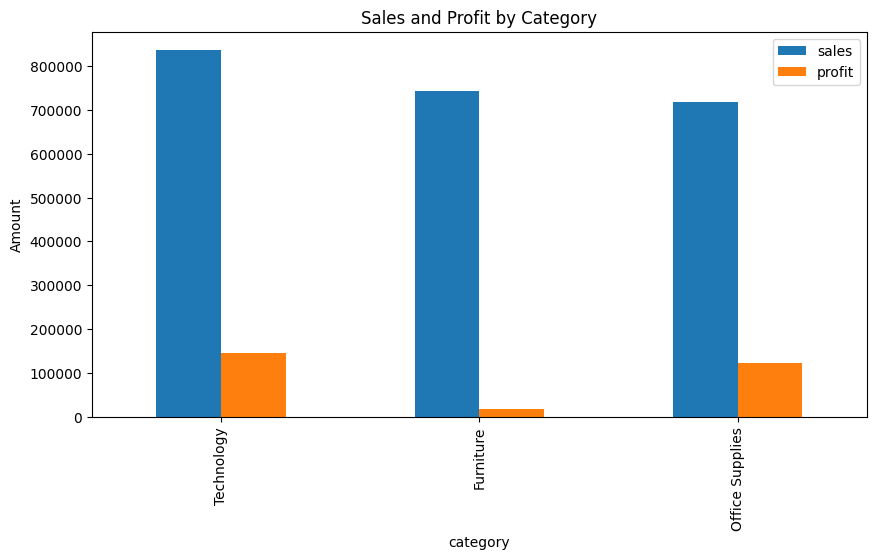

In [25]:
# Bar plot: Sales and profit by category
category_analysis.plot(kind='bar', figsize=(10, 5), title="Sales and Profit by Category")
plt.ylabel("Amount")
plt.show()


2. Profit vs Discount

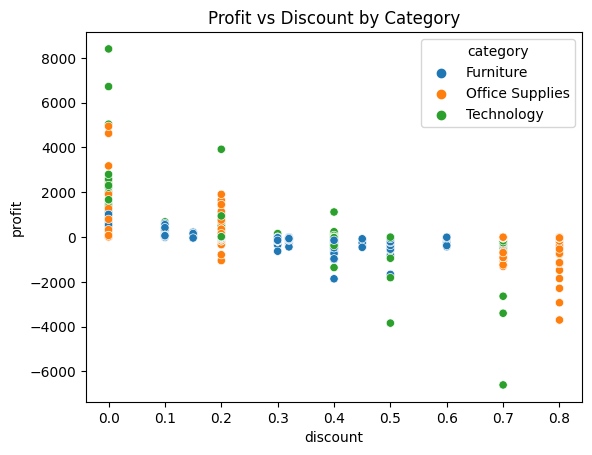

In [26]:
# Profit vs Discount scatterplot
sns.scatterplot(data=df, x='discount', y='profit', hue='category')
plt.title("Profit vs Discount by Category")
plt.show()


3.Sales vs. Profit by Category
Purpose: Understand which categories are most profitable.

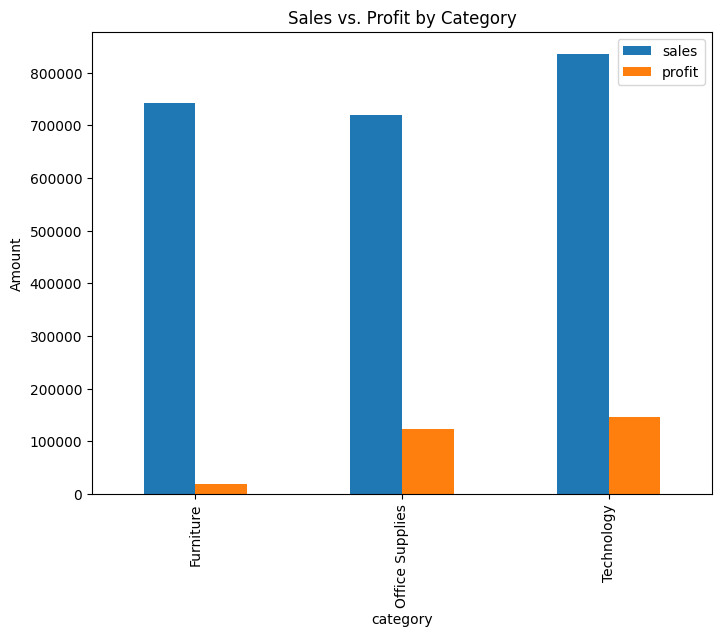

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales and Profit by Category
category_analysis = df.groupby('category')[['sales', 'profit']].sum()

# Plot
category_analysis.plot(kind='bar', figsize=(8, 6), title='Sales vs. Profit by Category', ylabel='Amount')
plt.show()


4. Sub-Category Sales & Profit
Purpose: Find subcategories that drive sales but may have low profits.


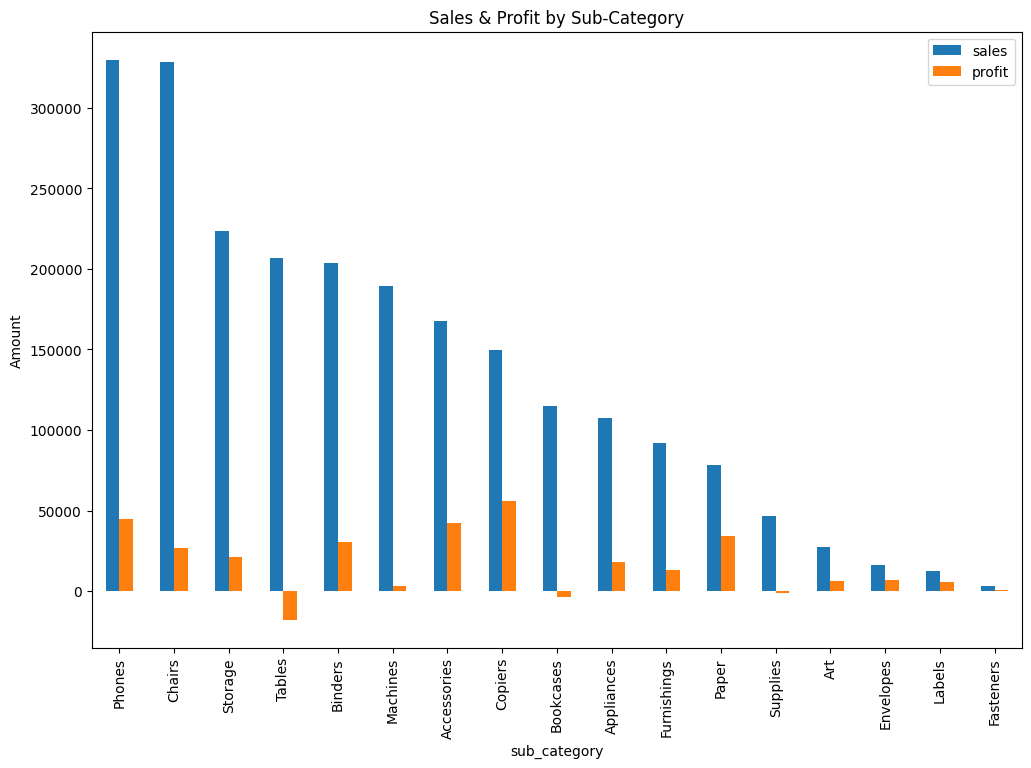

In [28]:
# Sub-Category Analysis
subcategory_analysis = df.groupby('sub_category')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

# Plot
subcategory_analysis.plot(kind='bar', figsize=(12, 8), title='Sales & Profit by Sub-Category', ylabel='Amount')
plt.show()


5.Regional Profit Distribution
Purpose: Identify regions with the highest and lowest profits.

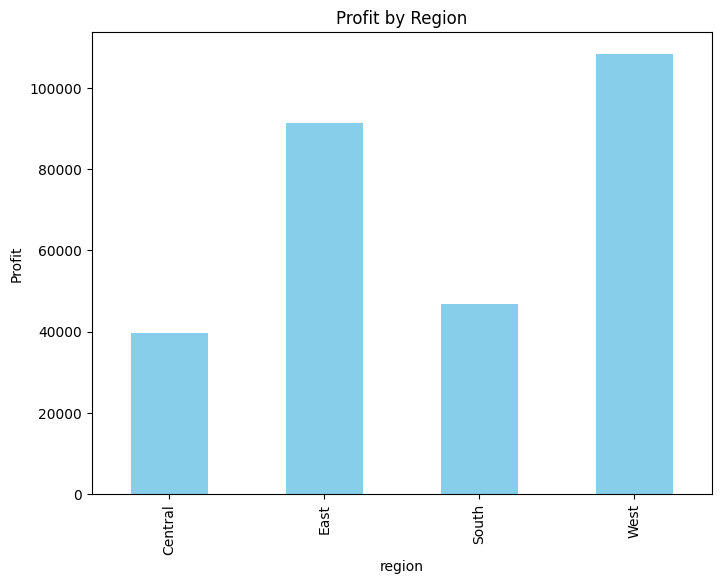

In [29]:
# Regional Profit
region_profit = df.groupby('region')['profit'].sum()

# Plot
region_profit.plot(kind='bar', color='skyblue', figsize=(8, 6), title='Profit by Region', ylabel='Profit')
plt.show()


6. State-wise Sales and Profit
   
Purpose: Highlight top and bottom states in terms of performance.

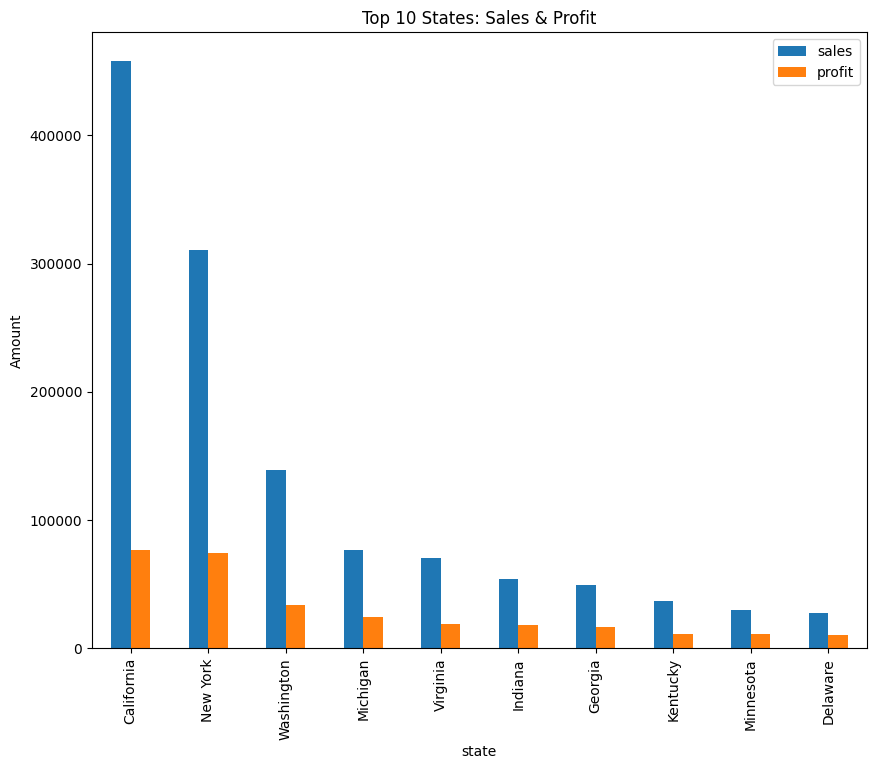

In [30]:
# State Sales & Profit
state_analysis = df.groupby('state')[['sales', 'profit']].sum().sort_values(by='profit', ascending=False)

# Plot
state_analysis.head(10).plot(kind='bar', figsize=(10, 8), title='Top 10 States: Sales & Profit', ylabel='Amount')
plt.show()


7. Discount Impact on Profit
   
Purpose: Understand how discounts affect profit margins.


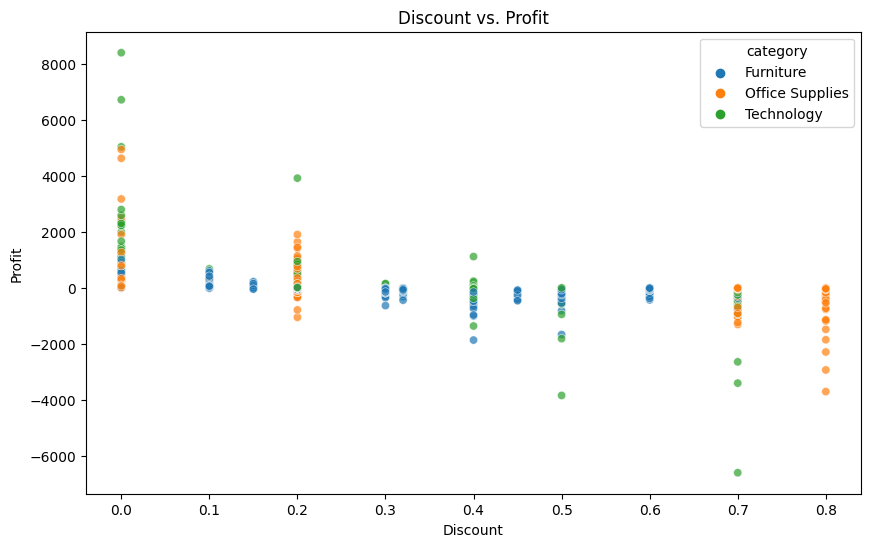

In [31]:
# Relationship between Discount and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount', y='profit', data=df, hue='category', alpha=0.7)
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


8.Heatmap of Sales by Region and Segment
Purpose: Identify key combinations of regions and customer segments.

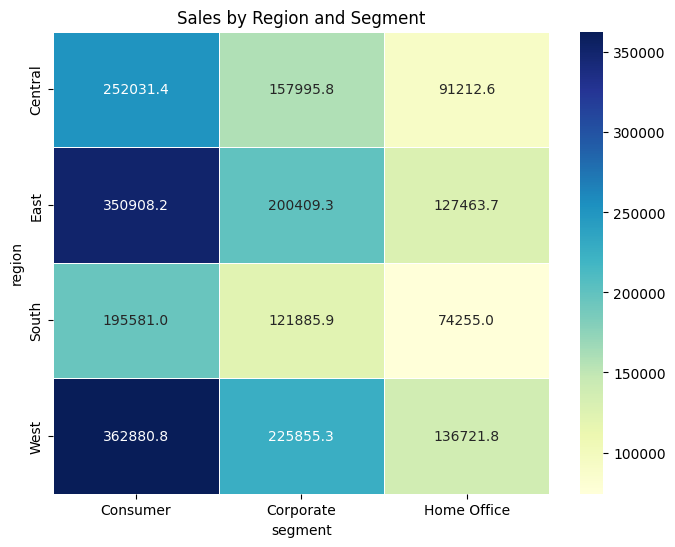

In [32]:
# Region-Segment Heatmap
region_segment = df.pivot_table(values='sales', index='region', columns='segment', aggfunc='sum')

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(region_segment, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Sales by Region and Segment')
plt.show()


9.Shipping Mode and Profitability

Purpose: Analyze which shipping modes contribute to profitability.


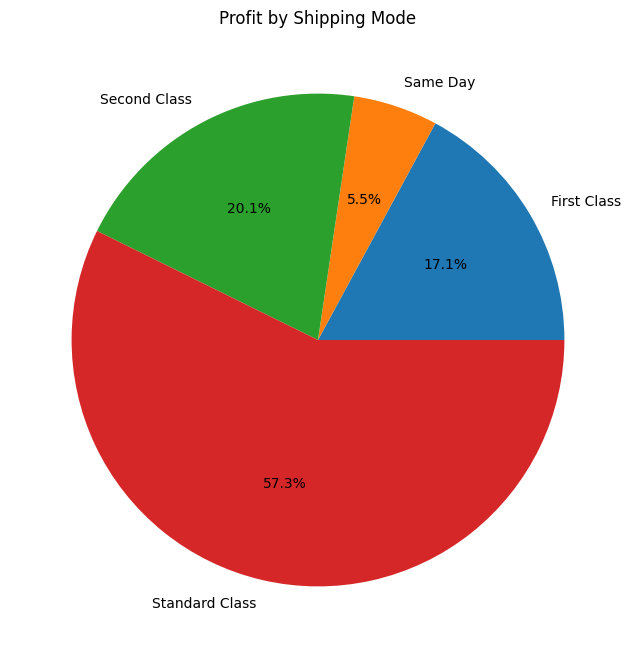

In [33]:
# Shipping Mode Profit
shipping_profit = df.groupby('ship_mode')['profit'].sum()

# Plot
shipping_profit.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Profit by Shipping Mode')
plt.ylabel('')
plt.show()


10.Correlation Heatmap

Purpose: Identify correlations between numeric variables.

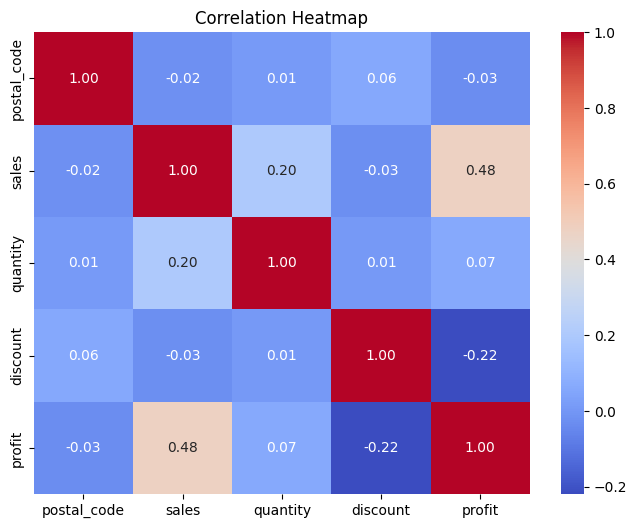

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


11. Profitability of Customer Segments
Purpose: Compare profit across customer segments.

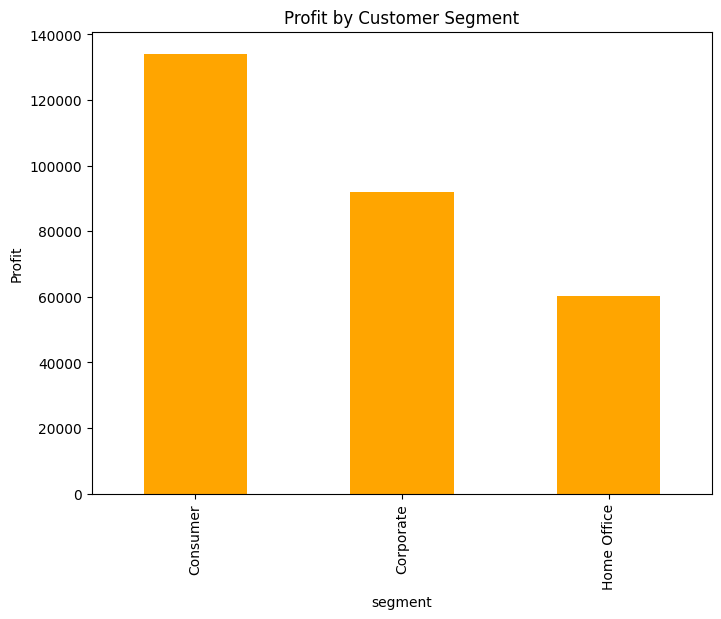

In [37]:
# Profit by Segment
segment_profit = df.groupby('segment')['profit'].sum()

# Plot
segment_profit.plot(kind='bar', color='orange', figsize=(8, 6), title='Profit by Customer Segment', ylabel='Profit')
plt.show()


# Conclusion
The exploration revealed critical insights, such as regional losses, subcategory profitability, and monthly sales trends. Addressing losses in specific regions and optimizing inventory for profitable subcategories can drive sustainable growth. These insights provide a foundation for data-driven decision-making to improve business performance.